<a href="https://colab.research.google.com/github/gehad-Ahmed30/Natural-Language-Processing/blob/main/Spam_Detection(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Spam Detection | Text Classification (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing & Inspecting Data

In [4]:
data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Pre-processing Data

##### Basic Data Pre-processing

In [8]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.rename(columns={'v1':'label','v2':'message'},inplace=True)
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
x = data['message']
x.head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
y = data['label'].map({'spam':0,'ham':1})
y.head()

,label
0,1
1,1
2,0
3,1
4,1


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
x_test.shape

(1839,)

In [15]:
y.shape

(5572,)

##### Text Pre-processing

In [16]:
x_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(num_words=20000)

In [25]:
tokenizer.fit_on_texts(x_train)

In [26]:
seq_train = tokenizer.texts_to_sequences(x_train)
seq_train

[[408,
  67,
  10,
  47,
  253,
  90,
  26,
  756,
  7,
  85,
  1093,
  79,
  80,
  816,
  2,
  28,
  5,
  1094,
  12,
  10],
 [1, 181, 191, 2, 83, 3, 52, 215, 5, 1743, 215, 3345],
 [2251, 3346, 55, 3347],
 [61, 33, 5, 2252, 14, 3348, 33, 1464, 15],
 [1256, 469, 1744, 8, 369, 2253],
 [355, 757, 547, 100, 1465, 885, 2, 13, 91, 192, 120],
 [758, 758, 292, 292, 615, 615, 3349],
 [39,
  321,
  207,
  159,
  1,
  136,
  101,
  390,
  1466,
  493,
  19,
  5,
  370,
  165,
  120,
  16,
  371,
  1745,
  208,
  1257,
  24,
  1,
  102,
  1,
  372,
  584,
  42,
  62],
 [52, 84, 96, 70, 2, 66, 15, 2, 10],
 [548],
 [17, 1095, 886, 1467, 2254, 20],
 [98,
  373,
  15,
  150,
  3350,
  98,
  33,
  157,
  98,
  201,
  2255,
  5,
  286,
  8,
  3351,
  86,
  5,
  3352,
  1096,
  7,
  22,
  1,
  155,
  1258,
  38,
  5,
  3353,
  3354,
  86,
  11,
  3355,
  371,
  233,
  24,
  975,
  494,
  20,
  7,
  51,
  1259,
  193,
  2256,
  21,
  40,
  41,
  7,
  44],
 [2257,
  1,
  65,
  3,
  23,
  132,
  1097,
  1,

In [28]:
seq_test = tokenizer.texts_to_sequences(x_test)
seq_test

[[1387,
  1289,
  1227,
  18,
  7190,
  18,
  18,
  39,
  116,
  1445,
  18,
  737,
  4,
  517,
  2355,
  33,
  1319],
 [1,
  177,
  11,
  5576,
  2,
  7,
  1,
  136,
  2,
  32,
  12,
  4,
  283,
  7232,
  1,
  102,
  36,
  3,
  21,
  727,
  14,
  32,
  4,
  3099,
  19,
  407,
  175,
  229,
  3065,
  106,
  399,
  9,
  75,
  10,
  5,
  1114,
  2336,
  1118],
 [35,
  53,
  265,
  138,
  3,
  53,
  22,
  2877,
  3,
  17,
  2,
  184,
  55,
  138,
  736,
  242,
  6393,
  239],
 [60,
  36,
  3,
  1726,
  13,
  251,
  55,
  81,
  212,
  81,
  3,
  37,
  7,
  789,
  67,
  10,
  8,
  5,
  172,
  2,
  199,
  10,
  53,
  3,
  443,
  15,
  8,
  46],
 [796,
  29,
  387,
  543,
  610,
  14,
  1069,
  542,
  704,
  45,
  438,
  18,
  94,
  576,
  459,
  311,
  72,
  574,
  2,
  962,
  2038,
  139,
  1399,
  3281],
 [85, 67, 939, 7, 199, 3, 53, 4617, 19],
 [104, 1, 1998, 83, 3, 104, 135, 21, 3, 20],
 [39, 140, 39, 3077, 49, 3078],
 [28,
  231,
  8,
  7,
  608,
  2,
  1969,
  1019,
  1151,
  166,
  81

In [29]:
len(seq_train)

3733

In [30]:
len(seq_test)

1839

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
data_train = pad_sequences(seq_train)
data_train

array([[   0,    0,    0, ..., 1094,   12,   10],
       [   0,    0,    0, ..., 1743,  215, 3345],
       [   0,    0,    0, ..., 3346,   55, 3347],
       ...,
       [   0,    0,    0, ...,  244,   30, 7259],
       [   0,    0,    0, ..., 1360,    1,  237],
       [   0,    0,    0, ...,    8,  283,  176]], dtype=int32)

In [33]:
data_train.shape

(3733, 121)

In [37]:
data_test = pad_sequences(seq_test,maxlen=data_train.shape[1])
data_test

array([[   0,    0,    0, ..., 2355,   33, 1319],
       [   0,    0,    0, ..., 1114, 2336, 1118],
       [   0,    0,    0, ...,  242, 6393,  239],
       ...,
       [   0,    0,    0, ...,  106,   79,  129],
       [   0,    0,    0, ...,  659,   38,   31],
       [   0,    0,    0, ...,   72, 1078,    2]], dtype=int32)

In [38]:
data_test.shape

(1839, 121)

## Model Training & Building

In [40]:
from tensorflow.keras.models import Model  #functional
from tensorflow.keras.layers import Dense,Embedding,Input,Flatten,LSTM,GlobalMaxPool1D

In [41]:
i = Input(shape=(data_train.shape[1],))   #121

In [45]:
x = Embedding(len(tokenizer.word_index)+1,20)(i)         #hidden layer

In [46]:
x = LSTM(15,return_sequences=True)(x)

In [47]:
x = GlobalMaxPool1D()(x)

In [48]:
x = Dense(1,activation='sigmoid')(x)   # x ألقديمة

In [49]:
model = Model(i,x)

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])      # accuracy --->classification

In [51]:
model.fit(data_train,y_train,epochs=20,validation_data=(data_test,y_test))

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8072 - loss: 0.5252 - val_accuracy: 0.8630 - val_loss: 0.3088
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8932 - loss: 0.2338 - val_accuracy: 0.9782 - val_loss: 0.1102
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9890 - loss: 0.0688 - val_accuracy: 0.9842 - val_loss: 0.0748
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9958 - loss: 0.0375 - val_accuracy: 0.9853 - val_loss: 0.0679
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.9980 - loss: 0.0222 - val_accuracy: 0.9848 - val_loss: 0.0656
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9989 - loss: 0.0146 - val_accuracy: 0.9853 - val_loss: 0.0669
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9999 - loss: 0.0092 - val_accuracy: 0.9853 - val_loss: 0.0668
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9994 - loss: 0.0086 - val_a

## Model Evaluation

In [52]:
model.history.history

{'accuracy': [0.8556120991706848,
  0.9330297112464905,
  0.9887489676475525,
  0.9959818124771118,
  0.9973211884498596,
  0.9989284873008728,
  0.999464213848114,
  0.999464213848114,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.42332345247268677,
  0.17902924120426178,
  0.06271225214004517,
  0.03286324441432953,
  0.021206557750701904,
  0.013640748336911201,
  0.010191187262535095,
  0.008067252114415169,
  0.005552623886615038,
  0.0042071291245520115,
  0.0035077743232250214,
  0.002979648532345891,
  0.0025629180017858744,
  0.0022300679702311754,
  0.001955196959897876,
  0.0017272824188694358,
  0.0015327439177781343,
  0.0013586628483608365,
  0.0012076105922460556,
  0.0010788124054670334],
 'val_accuracy': [0.8629689812660217,
  0.9782490730285645,
  0.9842305779457092,
  0.985318124294281,
  0.9847743511199951,
  0.985318124294281,
  0.985318124294281,
  0.9847743511199951,
  0.9842305779457092,
  0.9836868047714233,
  

In [53]:
pd.DataFrame(model.history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.855612,0.423323,0.862969,0.308812
1,0.933030,0.179029,0.978249,0.110216
2,0.988749,0.062712,0.984231,0.074821
3,0.995982,0.032863,0.985318,0.067879
4,0.997321,0.021207,0.984774,0.065587
5,0.998928,0.013641,0.985318,0.066888
6,0.999464,0.010191,0.985318,0.066837
7,0.999464,0.008067,0.984774,0.068461
8,1.000000,0.005553,0.984231,0.071753
9,1.000000,0.004207,0.983687,0.073845


<Axes: >

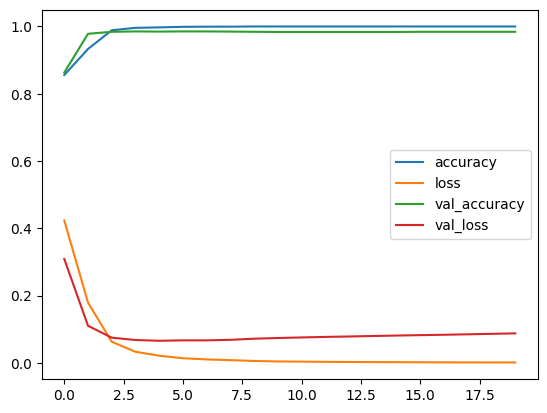

In [54]:
pd.DataFrame(model.history.history).plot()